# Sources:
- https://pytorch.org/tutorials/beginner/basics/intro.html

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [14]:
# !pip install torchvision seaborn

# Tensors

In [5]:
data = [[1,2],
        [3,4]]

In [8]:
data

[[1, 2], [3, 4]]

In [6]:
# directly from data 
x_data = torch.tensor(data)

In [7]:
x_data

tensor([[1, 2],
        [3, 4]])

In [10]:
# from a numpy array 
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [11]:
x_np

tensor([[1, 2],
        [3, 4]])

In [12]:
# The new tensor retains the properties (shape, datatype) of the argument tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [13]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.8486, 0.9327],
        [0.1026, 0.4989]]) 



In [14]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
# torch.rand(3,4,4,4)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4379, 0.9097, 0.0416],
        [0.5498, 0.1731, 0.0603]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [15]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [16]:
# Standard numpy-like indexing and slicing:
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [17]:
tensor[0]

tensor([1., 0., 1., 1.])

In [53]:
tensor.ndim

2

In [57]:
# Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. 
# See also torch.stack

torch.cat([tensor,tensor], dim=1)  #default dim=0 

tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1.]])

In [20]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [22]:
torch.cat([tensor,tensor]).ndim

2

In [21]:
torch.stack([tensor,tensor]).ndim

3

# Arithmetic operations

In [58]:

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T  
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [63]:
# Single-element tensors If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [64]:
# In-place operations Operations that store the result into the operand are called in-place.
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [65]:
# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
# np.array(t)
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [70]:
t.add_(1)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

In [69]:
n = np.ones(5)
t = torch.from_numpy(n)

In [73]:
np.add(n, 1, out=n)

array([4., 4., 4., 4., 4.])

# Datasets & Dataloaders
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html 

In [74]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor 
import matplotlib.pyplot as plt 

In [75]:
"""
Params of FashionMNIST Dataset:
- root: is the path where the train/test data is stored,
- train: specifies training or test dataset,
- download=True: downloads the data from the internet if it’s not available at root.
- transform and target_transform: specify the feature and label transformations
"""

training_data = datasets.FashionMNIST(
    root = "./data",
    train=True,
    download=True,
    transform=ToTensor()    
    )

test_data = datasets.FashionMNIST(
    root = "./data",
    train=False,
    download=True,
    transform=ToTensor()    
    ) 

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


In [76]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

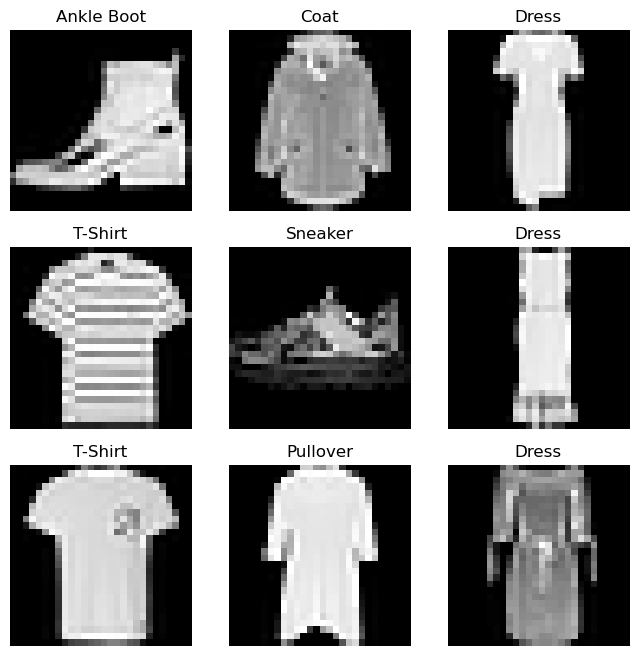

In [77]:
# Iterating and Visualizing the Dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Transforms 

In [78]:
from torchvision.transforms import ToTensor, Lambda

In [ ]:
"""
The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter_ which assigns a value=1 on the index as given by the label y.
"""

training_data = datasets.FashionMNIST(
    root = "./data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))  #for one-hot encoding 
    )

In [79]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Automatic Differentiation
- https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. 

In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the requires_grad property of those tensors.

In [35]:
x = torch.ones(5)  #input tensor
y = torch.zeros(3)  #expected output

In [36]:
# params to optimize

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

In [37]:
z = torch.matmul(x, w) + b

In [38]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [39]:
loss

tensor(2.6850, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

## Computing Gradients

A function that we apply to tensors to construct computational graph is in fact an object of class Function. 
This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. 

A reference to the backward propagation function is stored in grad_fn property of a tensor. 

To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need loss wrt w, loss wrt b under some fixed values of x and y. 

To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad

In [40]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x29ab7fca0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x29ab7fcd0>


In [41]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1858, 0.3032, 0.3307],
        [0.1858, 0.3032, 0.3307],
        [0.1858, 0.3032, 0.3307],
        [0.1858, 0.3032, 0.3307],
        [0.1858, 0.3032, 0.3307]])
tensor([0.1858, 0.3032, 0.3307])


## Disabling Gradient Tracking 

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. However, there are some cases when we do not need to do that, for example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. 

There are reasons you might want to disable gradient tracking:

- To mark some parameters in your neural network as frozen parameters.
- To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.


We can stop tracking computations by surrounding our computation code with torch.no_grad() block.

Another way to achieve the same result is to use the detach() method on the tensor.

In [42]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [43]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


# Optimizing Model Parameters
- https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

Now that we have a model and data it’s time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous section), and optimizes these parameters using gradient descent. 




In [45]:
# prerequisite
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
# model = NeuralNetwork()

## Hyperparameters
- https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates


- Number of Epochs - the number times to iterate over the dataset

- Batch Size - the number of data samples propagated through the network before the parameters are updated

- Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [48]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Loss Function

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, and nn.NLLLoss (Negative Log Likelihood) for classification. nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss.

We pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.

In [49]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()


## Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Full Implementation

In [51]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [53]:
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [54]:
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307526  [   64/60000]
loss: 2.292961  [ 6464/60000]
loss: 2.275815  [12864/60000]
loss: 2.273693  [19264/60000]
loss: 2.249394  [25664/60000]
loss: 2.226959  [32064/60000]
loss: 2.236437  [38464/60000]
loss: 2.202532  [44864/60000]
loss: 2.192472  [51264/60000]
loss: 2.163389  [57664/60000]
Test Error: 
 Accuracy: 40.9%, Avg loss: 2.157350 

Epoch 2
-------------------------------
loss: 2.168182  [   64/60000]
loss: 2.159090  [ 6464/60000]
loss: 2.098596  [12864/60000]
loss: 2.118662  [19264/60000]
loss: 2.073831  [25664/60000]
loss: 2.007686  [32064/60000]
loss: 2.050139  [38464/60000]
loss: 1.964725  [44864/60000]
loss: 1.963769  [51264/60000]
loss: 1.906926  [57664/60000]
Test Error: 
 Accuracy: 49.5%, Avg loss: 1.894366 

Epoch 3
-------------------------------
loss: 1.926684  [   64/60000]
loss: 1.903347  [ 6464/60000]
loss: 1.777662  [12864/60000]
loss: 1.824379  [19264/60000]
loss: 1.725507  [25664/60000]
loss: 1.662947  [32064/600

#  Save and Load the Model
- https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

## Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method.

To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

In [55]:
import torchvision.models as models

model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/donginkim/.cache/torch/hub/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

15.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

27.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_

In [56]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Saving and Loading Models with Shapes
When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:

In [57]:
torch.save(model, 'model.pth')

In [58]:
model = torch.load('model.pth')